In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/clicks-conversion-tracking/KAG_conversion_data.csv


The questions to be answered are as follows:

**1. How to optimize the social ad campaigns for the highest conversion rate possible? (Attain best Reach to Conversion ratios/Click to Conversion ratios)**

**2. Finding the perfect target demographics with the appropriate click through rates**

**3. Understanding the ideal turnaround/decision making time per age group to convert and re-target future social campaigns**

**4. Comparing the individual campaign performance so the best creative/campaign can be run again with adjusted audiences.**

Let me try to answer these questions one by one. To kick things off the data set must be read.

In [36]:
df = pd.read_csv("/kaggle/input/clicks-conversion-tracking/KAG_conversion_data.csv")

In [37]:
#To view the top of the data to confirm our dataset is correct
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [38]:
df.shape

(1143, 11)

In [39]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


We want to first deal with cleaning up the data and preparing it for some EDA in order to draw conclusions from the data provided to us.

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


This gives us a rundown of whether any null values are present as the type of data as well as data type of all our features.

**Data Cleaning and Preparation**

In [41]:
#For data cleaning let us check what percent of data is missing in the data
missing_percent = (df.isnull().sum()/len(df))*100
df_miss = pd.DataFrame(missing_percent)
df_miss

,0
ad_id,0.0
xyz_campaign_id,0.0
fb_campaign_id,0.0
age,0.0
gender,0.0
interest,0.0
Impressions,0.0
Clicks,0.0
Spent,0.0
Total_Conversion,0.0


No missing values are present in the entire dataset. Hence no need for handling any missing values. Let us see the correlation matrix of the data.

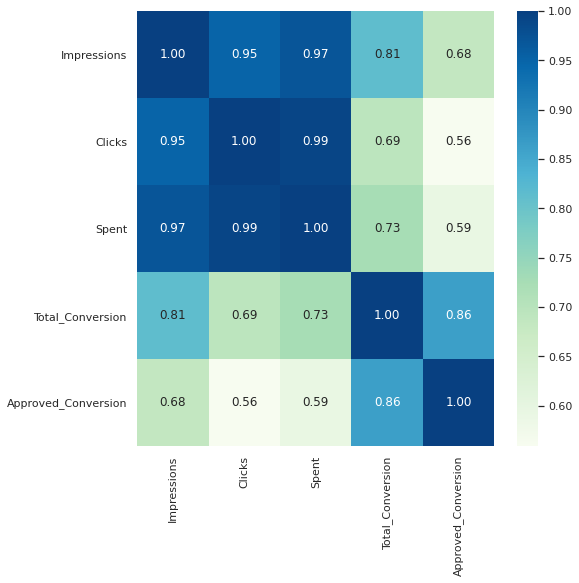

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
features = ["Impressions","Clicks","Spent","Total_Conversion","Approved_Conversion"]
g=sns.heatmap(df[features].corr(),annot=True ,fmt=".2f", cmap="GnBu")

It is visible here that high correlation is present of Approved Conversion with the features in the following order:
1. Total_Conversion
2. Impressions
3. Spent
4. Clicks

<AxesSubplot:xlabel='Total_Conversion', ylabel='Approved_Conversion'>

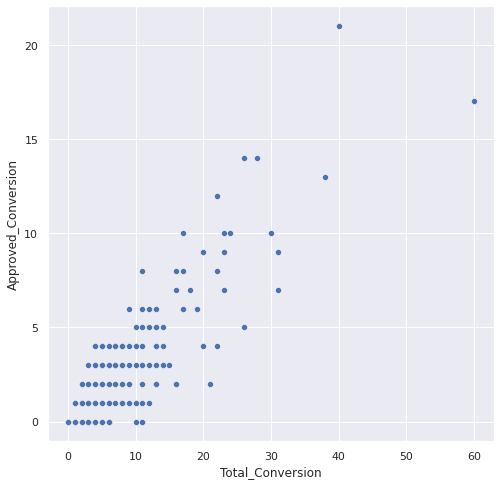

In [43]:
#Viewing Total Conversion and Approved  Conversion in Scatterplot
sns.set(rc={'figure.figsize':(8,8)})
sns.scatterplot(x='Total_Conversion',y='Approved_Conversion',data=df)

In [44]:
#Choosing to drop the outliers in the following scatterplot.
df=df.drop(df[(df['Total_Conversion']>30)&(df['Approved_Conversion']>10)].index)

<AxesSubplot:xlabel='Total_Conversion', ylabel='Approved_Conversion'>

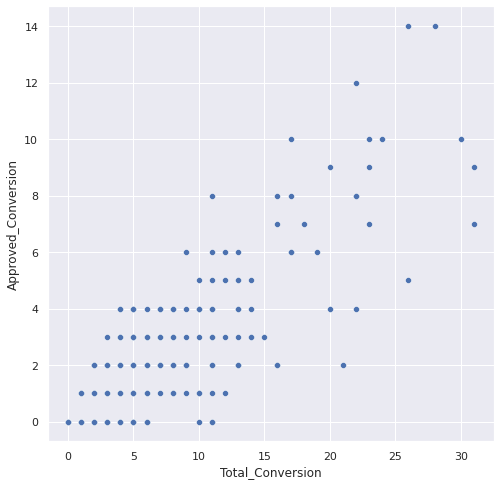

In [45]:
sns.set(rc={'figure.figsize':(8,8)})
sns.scatterplot(x='Total_Conversion',y='Approved_Conversion',data=df)

Now to divide columns into numerical and categorical.

In [46]:
categorical_cols = [cname for cname in df.columns if
                    df[cname].nunique() < 10 and 
                    df[cname].dtype == "object"]
categorical_cols

['age', 'gender']

In [47]:
numerical_cols = [cname for cname in df.columns if 
                df[cname].dtype in ['int64', 'float64']]
numerical_cols

['ad_id',
 'xyz_campaign_id',
 'fb_campaign_id',
 'interest',
 'Impressions',
 'Clicks',
 'Spent',
 'Total_Conversion',
 'Approved_Conversion']

**Exploratory Data Analysis**

The various features in accordance to the questions given to us need to be compared in order to make some sense out of the raw data given to us.

In [48]:
#From above data provided to us we can see that xyz_campaign_id is a numerical category but to visualize data in accordance with unique campaigns, I have chosen to convert it to a categorical column

df["xyz_campaign_id"].replace({916:"A",936:"B",1178:"C"}, inplace=True)

In [49]:
categorical_cols = [cname for cname in df.columns if
                    df[cname].nunique() < 10 and 
                    df[cname].dtype == "object"]
categorical_cols

['xyz_campaign_id', 'age', 'gender']

In [50]:
numerical_cols = [cname for cname in df.columns if 
                df[cname].dtype in ['int64', 'float64']]
numerical_cols

['ad_id',
 'fb_campaign_id',
 'interest',
 'Impressions',
 'Clicks',
 'Spent',
 'Total_Conversion',
 'Approved_Conversion']

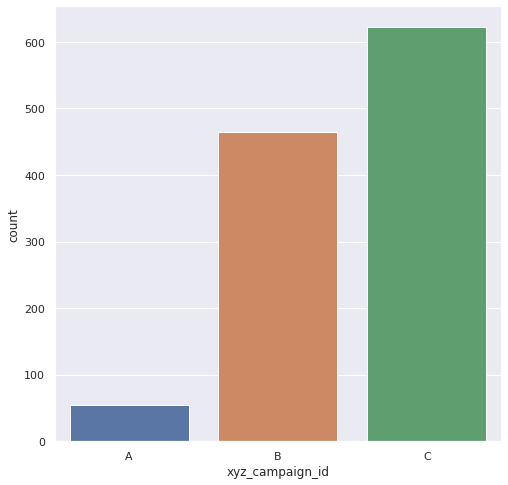

In [51]:
sns.countplot(x ='xyz_campaign_id', data = df) 
plt.show() 

Thus we can see that C campaign or 1178 has the highest count of ads.

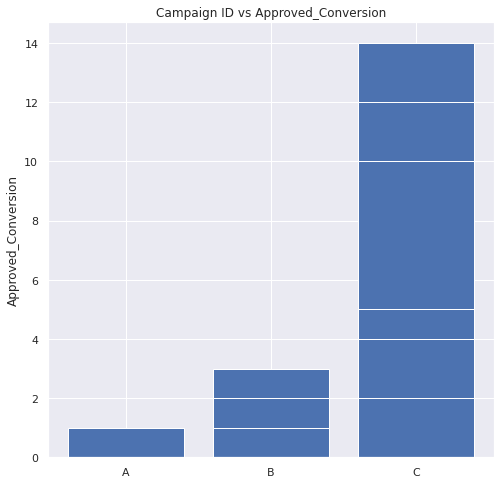

In [52]:
plt.bar(df["xyz_campaign_id"], df["Approved_Conversion"])
plt.ylabel("Approved_Conversion")
plt.title("Campaign ID vs Approved_Conversion")
plt.show()

So, it is quite obvious from both above plots that campaign C is the most successful ad campaign, having the highest ads as well as the most amount of approved conversion. But it seems we have to see whether the conversion rate is high for C as well or not.

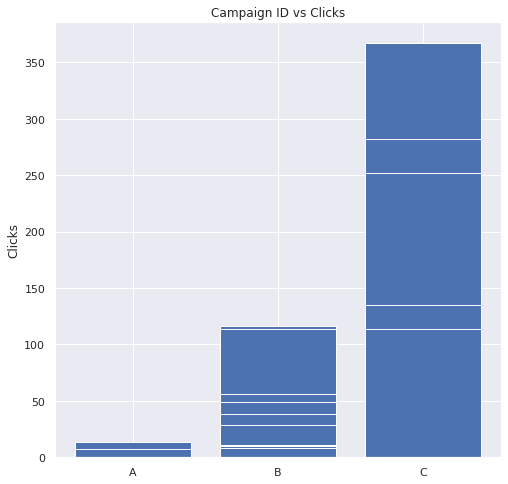

In [53]:
plt.bar(df["xyz_campaign_id"], df["Clicks"])
plt.ylabel("Clicks")
plt.title("Campaign ID vs Clicks")
plt.show()

In terms of Clicks to Conversion rate too, C is leading as well. Thus it can be safely established that C is the most successful ad campaign. Now let us investigate the age demographic.

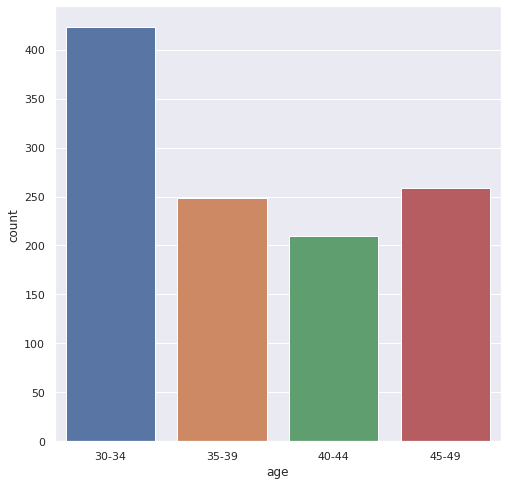

In [54]:
sns.countplot(x ='age', data = df) 
plt.show() 

<AxesSubplot:xlabel='xyz_campaign_id', ylabel='Approved_Conversion'>

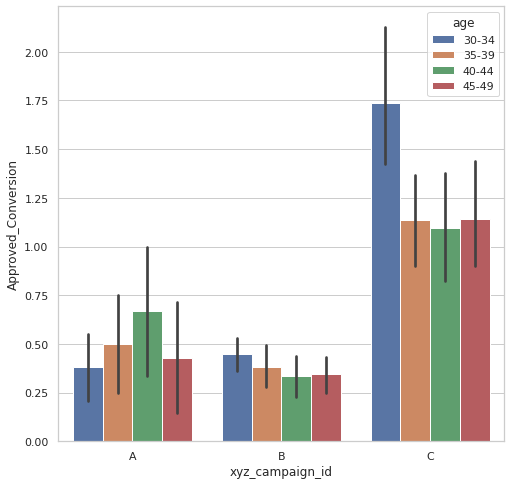

In [55]:
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
sns.barplot(x=df["xyz_campaign_id"], y=df["Approved_Conversion"], hue=df["age"], data=tips)

Trends to be noted:
- Campaign A has highest age conversion at 40-44 year olds
- Campaign B and C both have their highest at 30-34 year olds

Now to investigate gender.

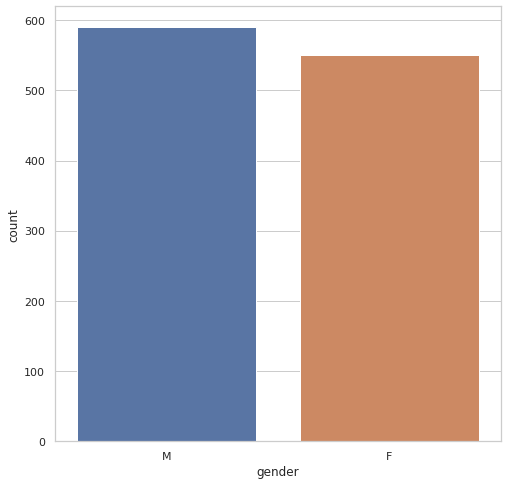

In [56]:
sns.countplot(x ='gender', data = df) 
plt.show() 

<AxesSubplot:xlabel='xyz_campaign_id', ylabel='Approved_Conversion'>

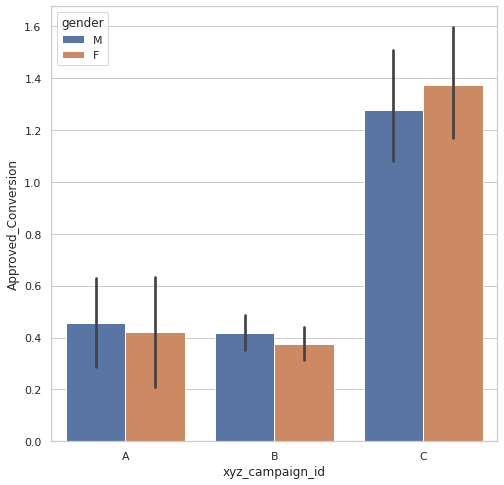

In [57]:
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
sns.barplot(x=df["xyz_campaign_id"], y=df["Approved_Conversion"], hue=df["gender"], data=tips)

Trends:
- Campaign A and B, male more interested than female
- Campaign C has more approved conversion with female

Now we shall perform an in depth analysis of how the age and gender affects the way the people are interacting with the ads and the products they present.

In [58]:
df['click_through'] = (df['Clicks'] / df['Impressions'])*100

<AxesSubplot:xlabel='age', ylabel='click_through'>

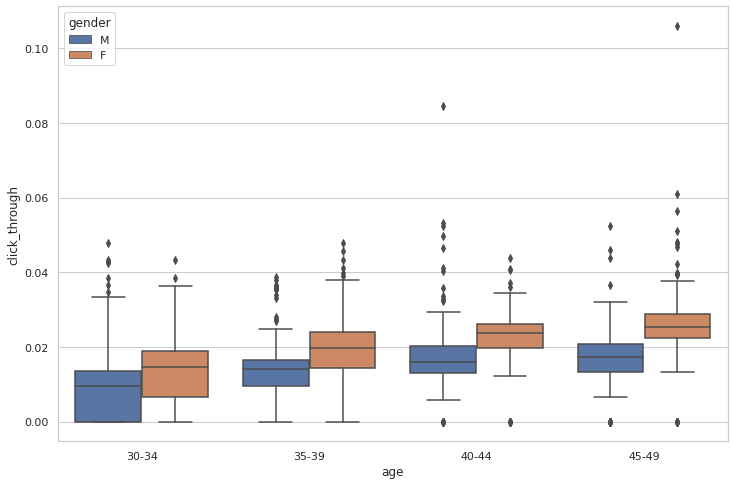

In [59]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df.age,y=df.click_through,hue=df.gender)

Thus women of age 45-49 have highest click through rates. => Answering our 2nd question.

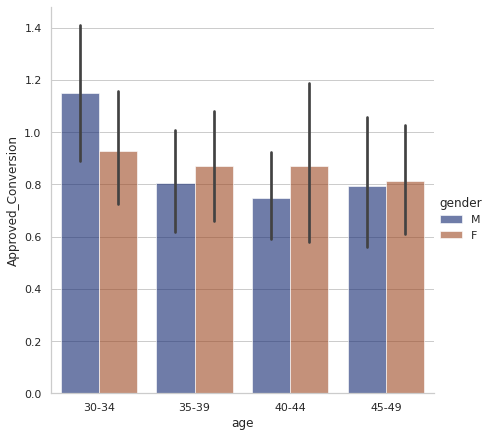

In [60]:
sns.catplot(data=df, kind="bar",x="age", y="Approved_Conversion", hue="gender",palette="dark", alpha=.6, height=6)

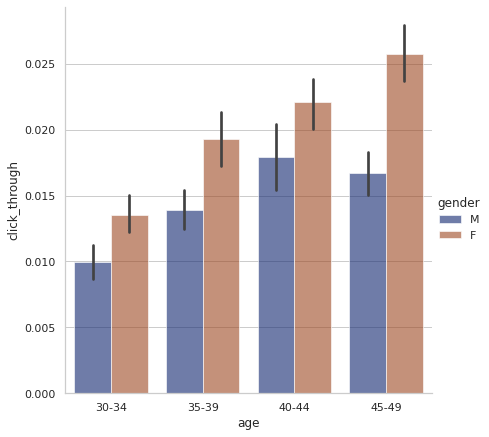

In [61]:
sns.catplot(data=df, kind="bar",x="age", y="click_through",hue="gender",palette="dark", alpha=.6, height=6)

From above two we can see that:
1. Age group 30-34 has low click through but high approved conversion, meaning their decision taking time is less.
1. Age 45-49 has very high click through but ends up taking maximum time to come to a decision out of all the age groups.
=> Answering 3rd Question. 

Hence we can now come to conclusive answers regarding our questions.

**1. The campaign 1178 or C has the most approved conversion thus it is quite effective and must be employed even more. Age group 30-34 takes less decision time to come to their conclusion and thus targetting them would be a nice way to increase conversion rate. To increase the reach, ad counts can always be increased.**

**2. Women of the age 45-49 have the highest click through rate, hence they are a perfect target demographic.**

**3. Decision time taking order: 30-34 < 35-39 < 40-44 < 45-49**

**4. Campaign C wins the battle among the 3 types of campaign significantly, but A does perform very well considering it's low ad count, beating even B in terms of conversion rate.**